# PREAMBLE
#### Some prelimiar configurations are made here, before importing the libraries and starting the code.

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_hmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (10.,8.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_cmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (12.,12.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
palette = ['#dfc27d', '#a6611a']
palette_inv = ['#a6611a', '#dfc27d']

# Functions

In [3]:
def standardization(variable):
    """
    :param variable: the array with the variables you wish to standardize
    :return: standardized array
    """
    var_average = np.average(variable)
    var_std     = np.std(variable)
    new_variable = []
    for i in range(variable.size):
        new_variable_i = (variable[i] - var_average)/var_std
        new_variable.append(new_variable_i)
    new_variable = np.array(new_variable)
    return new_variable

# Libraries

In [4]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import seaborn              as sns
import os
import sklearn.preprocessing as pp

In [5]:
psm_path = '../../LargeFilesResults/PSM_analysis/'

In [6]:
psmed_data_magphys = pd.read_csv(os.path.join(psm_path, 'uv_redseq_psmed_oneneighbor_magphys.csv'))

In [7]:
dust_data = pd.read_csv('../../Match/ALL_GAMA_MAGPHYS_SELECTED.csv')

In [8]:
mass_frac = dust_data['mass_dust_best_fit']/(dust_data['mass_stellar_best_fit']+dust_data['mass_dust_best_fit'])

In [9]:
duspedia_ratio = np.log10(dust_data['mass_stellar_best_fit'].values/dust_data['mass_dust_best_fit'].values)

In [10]:
dust_data['mass_fraction'] = mass_frac
dust_data['log_mdust/mstar'] = duspedia_ratio

In [11]:
new_match = psmed_data_magphys.merge(dust_data, on=['CATAID'], how='left', indicator=True)

In [12]:
new_match

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,L_dust_percentile97_5_y,mass_dust_best_fit_y,mass_dust_percentile2_5_y,mass_dust_percentile16_y,mass_dust_percentile50_y,mass_dust_percentile84_y,mass_dust_percentile97_5_y,mass_fraction,log_mdust/mstar,_merge
0,594994,588848899931439415,222.9286,-0.152468,3.50,4.62,20.6537,0.0385,2,19.4048,...,9.992,1088000.0,5.857,6.292,6.707,7.132,7.482,0.000017,4.771987,both
1,600232,588848900429578535,134.3863,0.325479,3.50,4.62,22.1271,0.1172,0,19.6814,...,10.010,6546000.0,5.802,6.357,6.812,7.202,7.527,0.000196,3.707120,both
2,609836,588848900448452756,177.4558,0.352174,3.50,4.62,21.1312,0.0543,2,19.1966,...,9.902,1228000.0,6.002,6.327,6.657,7.022,7.362,0.000036,4.438174,both
3,610293,588848900449370284,179.6213,0.360711,3.50,5.28,21.0113,0.0503,0,19.4856,...,10.720,27360000.0,7.337,7.372,7.417,7.467,7.532,0.001706,2.767275,both
4,610441,588848900449632462,180.2054,0.211046,3.50,4.62,99.0000,99.0000,2,19.6212,...,10.430,40370000.0,6.192,6.757,7.287,7.722,8.052,0.000287,3.541618,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,145244,587724650869227683,183.6240,-1.323914,3.50,4.62,20.9746,0.0587,2,19.3470,...,9.682,1736000.0,5.552,6.017,6.427,6.842,7.202,0.000080,4.095105,both
134,145646,587724650870079712,185.5760,-1.271044,3.65,5.28,20.5001,0.0599,2,19.1995,...,10.430,120800000.0,7.002,7.262,7.582,7.912,8.112,0.001348,2.869659,both
135,239670,587726014548934888,218.6060,1.636215,3.50,4.62,21.6036,0.1446,0,19.0099,...,10.050,6571000.0,5.992,6.562,6.947,7.297,7.587,0.000107,3.972583,both
136,240001,587726014549590290,220.0579,1.619308,3.55,4.62,21.1631,0.0964,0,19.7233,...,10.390,7559000.0,6.237,6.707,7.097,7.502,7.847,0.000058,4.237811,both


In [13]:
# for i in psmed_data_magphys.keys():
#     print(i)

In [14]:
uv_upturn = new_match[new_match['UV_CLASS_YI2011']=='UV_UPTURN']
uv_weak   = new_match[new_match['UV_CLASS_YI2011']=='UV_WEAK']

# Blanton properties

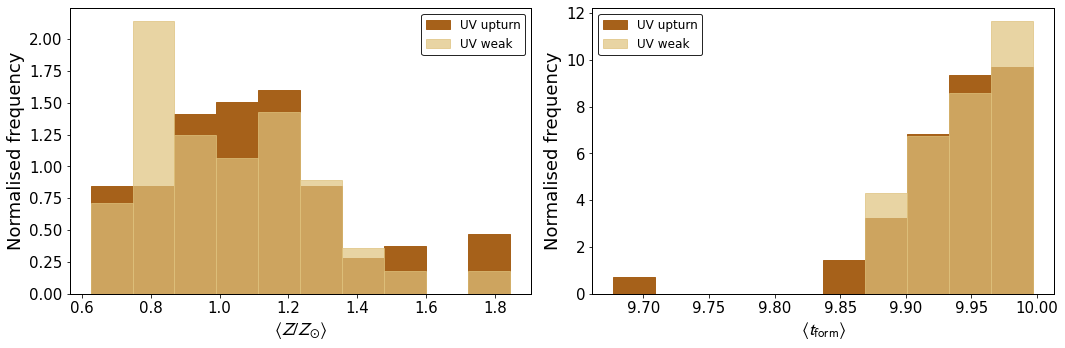

In [15]:
plt.rcParams.update(plotpars_2cols)
plt.subplot(1,2,1)
n, bins, patches = plt.hist(uv_upturn['metalicity_Z_Zo_percentile50'], color=palette[1], label='UV upturn', 
                            density=True, bins=10, edgecolor=palette[1])
plt.hist(uv_weak['metalicity_Z_Zo_percentile50'], color=palette[0], label='UV weak', density=True, bins=bins,
         alpha=0.7, 
         edgecolor=palette[0])
# plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r"$\left<Z/Z_{\odot}\right>$")
plt.ylabel('Normalised frequency')


plt.subplot(1,2,2)
n, bins, patches = plt.hist(uv_upturn['tform_percentile50'], color=palette[1], label='UV upturn', density=True, 
                            bins=10, edgecolor=palette[1], alpha=1)
plt.hist(uv_weak['tform_percentile50'], color=palette[0], label='UV weak', density=True, bins=bins, alpha=0.7, 
         edgecolor=palette[0])
# plt.yscale('log')
plt.xlabel(r"$\left<t_{\rm{form}}\right>$")
plt.ylabel('Normalised frequency')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_tform.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_tform.pdf'))
plt.show()

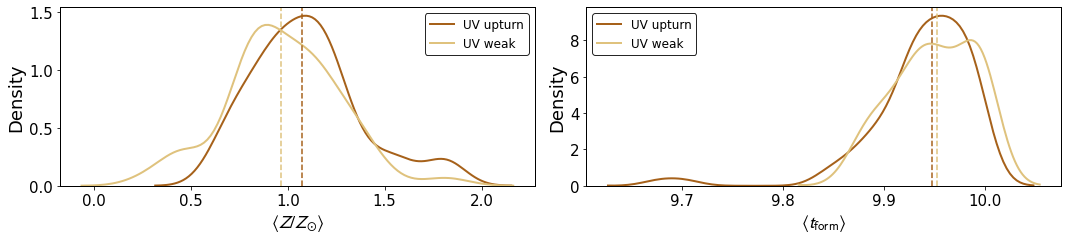

In [16]:
plt.rcParams.update(plotpars_2cols)

plt.subplots(figsize=(15,3.5))
plt.subplot(1,2,1)
sns.kdeplot(uv_upturn['metalicity_Z_Zo_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['metalicity_Z_Zo_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
# plt.yscale('log')
plt.axvline(x=np.median(uv_upturn['metalicity_Z_Zo_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['metalicity_Z_Zo_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left<Z/Z_{\odot}\right>$")
plt.ylabel('Density')


plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['tform_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['tform_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
# plt.yscale('log')
plt.axvline(x=np.median(uv_upturn['tform_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['tform_percentile50'].values), color=palette[0], linestyle='--')
plt.xlabel(r"$\left<t_{\rm{form}}\right>$")
plt.ylabel('Density')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_tform_kernel.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_met_tform_kernel.pdf'))
plt.show()

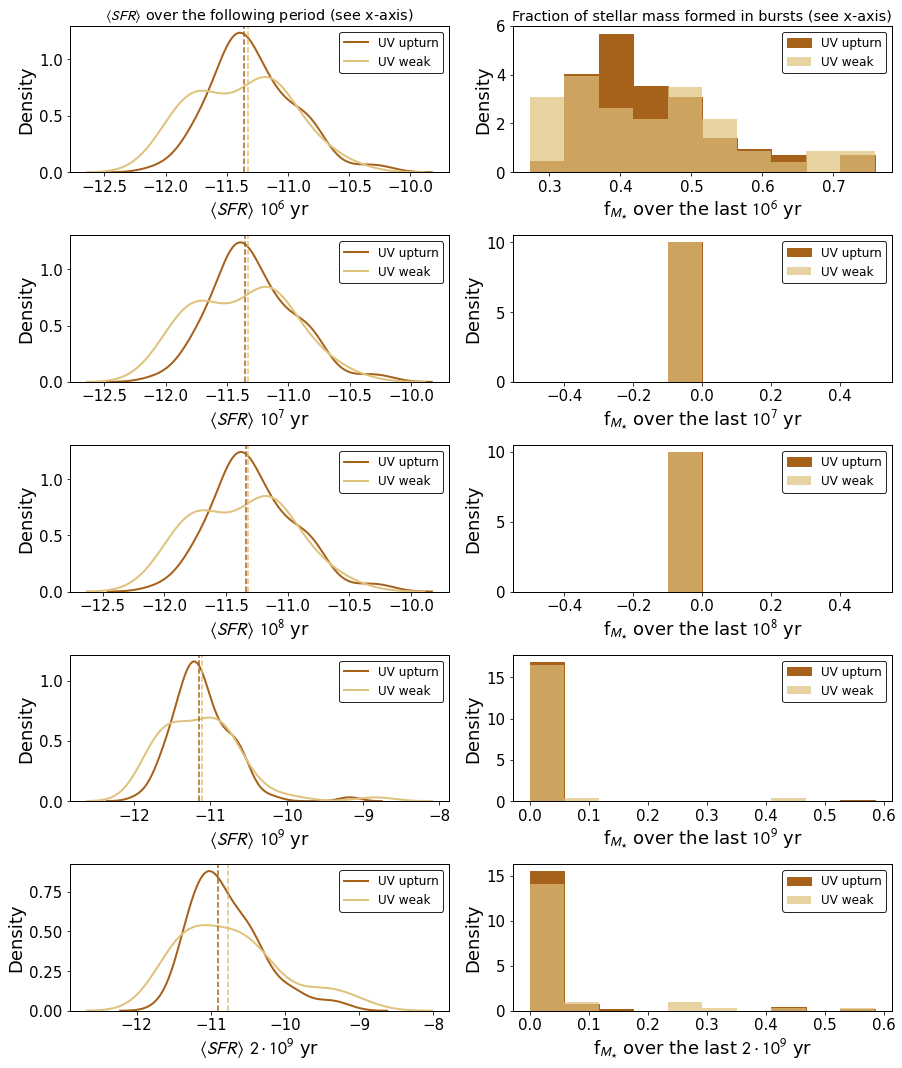

In [17]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(13, 15))

plt.subplot(5,2,1)
plt.title(r"$\left< SFR \right>$ over the following period (see x-axis)")
sns.kdeplot(uv_upturn['sfr16_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr16_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr16_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr16_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< SFR \right>$ $10^6$ yr")
plt.ylabel('Density')

plt.subplot(5,2,2)
plt.title(r"Fraction of stellar mass formed in bursts (see x-axis)")
n, bins, patches = plt.hist(uv_upturn['fb16_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb16_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.xlabel(r"f$_{M_{\star}}$ over the last $10^6$ yr")
plt.ylabel('Density')
plt.ylim([0, 6])
plt.legend(loc='best')

plt.subplot(5,2,3)
sns.kdeplot(uv_upturn['sfr17_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr17_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr17_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr17_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< SFR \right>$ $10^7$ yr")
plt.ylabel('Density')

plt.subplot(5,2,4)
n, bins, patches = plt.hist(uv_upturn['fb17_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb17_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.legend(loc='best')
plt.xlabel(r"f$_{M_{\star}}$ over the last $10^7$ yr")
plt.ylabel('Density')


plt.subplot(5,2,5)
sns.kdeplot(uv_upturn['sfr18_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr18_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr18_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr18_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< SFR \right>$ $10^8$ yr")
plt.ylabel('Density')

plt.subplot(5,2,6)
n, bins, patches = plt.hist(uv_upturn['fb18_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb18_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.xlabel(r"f$_{M_{\star}}$ over the last $10^8$ yr")
plt.ylabel('Density')
plt.legend(loc='best')

plt.subplot(5,2,7)
sns.kdeplot(uv_upturn['sfr19_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr19_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr19_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr19_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< SFR \right>$ $10^9$ yr")
plt.ylabel('Density')

plt.subplot(5,2,8)
n, bins, patches = plt.hist(uv_upturn['fb19_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb19_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.xlabel(r"f$_{M_{\star}}$ over the last $10^9$ yr")
plt.ylabel('Density')
plt.legend(loc='best')

plt.subplot(5,2,9)
sns.kdeplot(uv_upturn['sfr29_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['sfr29_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['sfr29_percentile50'].values), linestyle='--', color=palette[1])
plt.axvline(x=np.median(uv_weak['sfr29_percentile50'].values), linestyle='--', color=palette[0])
plt.legend(loc='best')
plt.xlabel(r"$\left< SFR \right>$ $2\cdot 10^9$ yr")
plt.ylabel('Density')

plt.subplot(5,2,10)
n, bins, patches = plt.hist(uv_upturn['fb29_percentile50'], color=palette[1], label='UV upturn', bins=10, 
                            density=True, histtype='stepfilled', edgecolor=palette[1])
plt.hist(uv_weak['fb29_percentile50'], color=palette[0], label='UV weak', bins=bins, density=True, alpha=0.7)
plt.xlabel(r"f$_{M_{\star}}$ over the last $2 \cdot 10^9$ yr")
plt.ylabel('Density')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_sfr_frac.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_sfr_frac.pdf'))
plt.show()

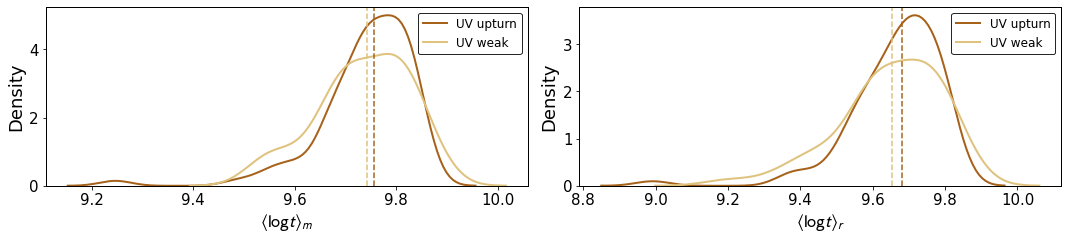

In [18]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,3.5))

plt.subplot(1,2,1)
sns.kdeplot(uv_upturn['agem_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['agem_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['agem_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \log t \right>_{m}$")
plt.ylabel('Density')


plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['ager_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['ager_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['ager_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['ager_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left<\log t\right>_{r}$")
plt.ylabel('Density')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_age.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_age.pdf'))
plt.show()

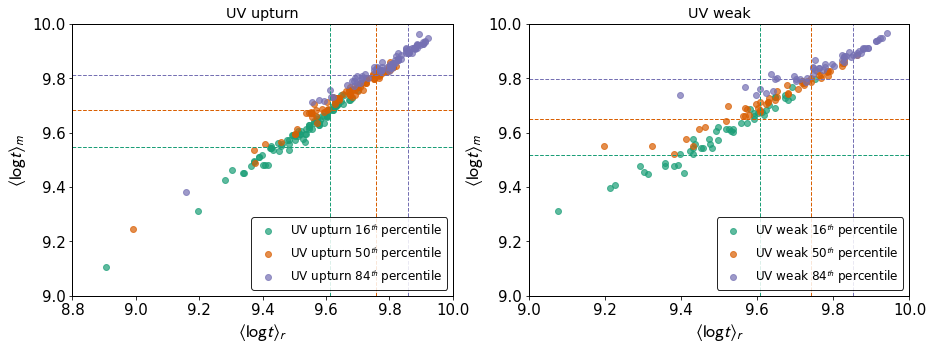

In [19]:
palette_err = ['#1b9e77','#d95f02','#7570b3']
alpha=0.7
plt.rcParams.update(plotpars_2cols)
plt.subplot(1, 2, 1)
plt.title(r"UV upturn")
plt.scatter(x=uv_upturn['ager_percentile16'], y=uv_upturn['agem_percentile16'], c=palette_err[0], alpha=alpha, 
            label=r"UV upturn 16$^{th}$ percentile")
plt.scatter(x=uv_upturn['ager_percentile50'], y=uv_upturn['agem_percentile50'], c=palette_err[1], alpha=alpha, 
            label=r"UV upturn 50$^{th}$ percentile")
plt.scatter(x=uv_upturn['ager_percentile84'], y=uv_upturn['agem_percentile84'], c=palette_err[2], alpha=alpha, 
            label=r"UV upturn 84$^{th}$ percentile")
plt.axhline(y=np.median(uv_upturn['ager_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_upturn['agem_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_upturn['ager_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_upturn['agem_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_upturn['ager_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_upturn['agem_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.legend(loc='lower right')
plt.ylim([9., 10.])
plt.xlim([8.8, 10.])
plt.xlabel(r"$\left< \log t \right>_{r}$")
plt.ylabel(r"$\left< \log t \right>_{m}$")

plt.subplot(1, 2, 2)
plt.title(r"UV weak")
plt.scatter(x=uv_weak['ager_percentile16'], y=uv_weak['agem_percentile16'], c=palette_err[0], alpha=alpha, 
            label=r"UV weak 16$^{th}$ percentile")
plt.scatter(x=uv_weak['ager_percentile50'], y=uv_weak['agem_percentile50'], c=palette_err[1], alpha=alpha, 
            label=r"UV weak 50$^{th}$ percentile")
plt.scatter(x=uv_weak['ager_percentile84'], y=uv_weak['agem_percentile84'], c=palette_err[2], alpha=alpha, 
            label=r"UV weak 84$^{th}$ percentile")
plt.axhline(y=np.median(uv_weak['ager_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile16'].values), color=palette_err[0], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_weak['ager_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile50'].values), color=palette_err[1], linewidth=1., linestyle='--')
plt.axhline(y=np.median(uv_weak['ager_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.axvline(x=np.median(uv_weak['agem_percentile84'].values), color=palette_err[2], linewidth=1., linestyle='--')
plt.legend(loc='lower right')
plt.ylim([9., 10.])
plt.xlim([9., 10.])
plt.xlabel(r"$\left< \log t \right>_{r}$")
plt.ylabel(r"$\left< \log t \right>_{m}$")

plt.savefig(os.path.join(psm_path, 'psm_magphys_ages_quantiles.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_ages_quantiles.pdf'))
plt.show()

In [20]:
plt.errorbar?

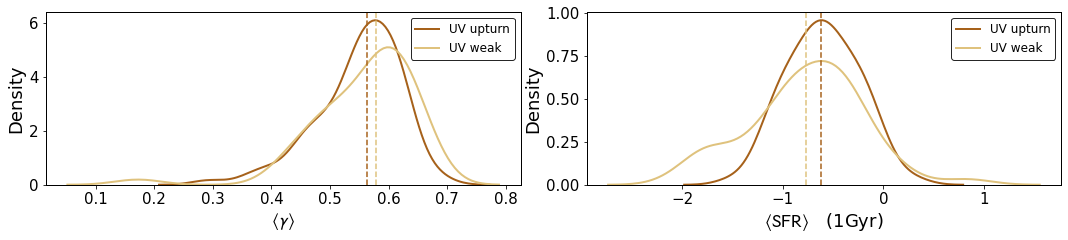

In [21]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,3.5))

plt.subplot(1,2,1)
sns.kdeplot(uv_upturn['gamma_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['gamma_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['gamma_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['gamma_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \gamma \right>$")
plt.ylabel('Density')


plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['SFR_0_1Gyr_percentile50'], color=palette[1], label='UV upturn', linewidth=2.)
sns.kdeplot(uv_weak['SFR_0_1Gyr_percentile50'], color=palette[0], label='UV weak', linewidth=2.)
plt.axvline(x=np.median(uv_upturn['SFR_0_1Gyr_percentile50'].values), color=palette[1], linestyle='--')
plt.axvline(x=np.median(uv_weak['SFR_0_1Gyr_percentile50'].values), color=palette[0], linestyle='--')
plt.legend(loc='best')
plt.xlabel(r"$\left< \rm{SFR} \right>$   (1Gyr)")
plt.ylabel('Density')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'psm_magphys_timescales_sfr1.png'))
plt.savefig(os.path.join(psm_path, 'psm_magphys_timescales_sfr1.pdf'))
plt.show()

In [22]:
colours = {}
colours['CATAID']  = psmed_data_magphys['CATAID'].values
colours['FUV-NUV'] = psmed_data_magphys['MAG_AB_FUV'].values - psmed_data_magphys['MAG_AB_NUV']
colours['FUV-R'] = psmed_data_magphys['MAG_AB_FUV'].values - psmed_data_magphys['MAG_AB_R']
colours['NUV-R'] = psmed_data_magphys['MAG_AB_NUV'].values - psmed_data_magphys['MAG_AB_R']
colours = pd.DataFrame(colours)

In [23]:
heatmap_df = psmed_data_magphys[['CATAID', 'UV_CLASS_YI2011', 'mass_stellar_best_fit', 'ager_percentile50',  
                                 'metalicity_Z_Zo_percentile50', 'sSFR_0_1Gyr_percentile50', 
                                 'tform_percentile50', 'tlastb_percentile50', 'fb29_percentile50',]]

In [24]:
heatmap_df = heatmap_df.merge(colours, how='inner', on='CATAID')

In [25]:
heatmap_df

,CATAID,UV_CLASS_YI2011,mass_stellar_best_fit,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
0,594994,UV_UPTURN,6.436000e+10,9.677,1.155,-11.72,9.977,9.412,0.0005,-0.044586,6.501088,6.545674
1,600232,UV_UPTURN,3.335000e+10,9.772,0.705,-11.62,9.977,9.512,0.0005,0.004124,5.478230,5.474106
2,609836,UV_UPTURN,3.368000e+10,9.747,0.955,-11.67,9.987,9.472,0.0005,-0.110283,5.987700,6.097983
3,610293,UV_UPTURN,1.601000e+10,8.992,0.625,-10.17,9.702,8.767,0.5855,0.743722,6.536491,5.792769
4,610441,UV_UPTURN,1.405000e+11,9.692,1.315,-11.92,9.962,9.477,0.0005,-0.627586,5.781909,6.409496
...,...,...,...,...,...,...,...,...,...,...,...,...
133,145244,UV_WEAK,2.161000e+10,9.762,0.825,-12.17,9.997,9.507,0.0005,1.837168,7.878351,6.041183
134,145646,UV_WEAK,8.948000e+10,9.742,0.465,-11.42,9.962,9.537,0.0005,1.618542,7.293679,5.675138
135,239670,UV_WEAK,6.169000e+10,9.827,0.805,-12.02,9.997,9.627,0.0005,2.227573,8.224235,5.996661
136,240001,UV_WEAK,1.307000e+11,9.432,1.255,-11.37,9.907,9.092,0.2685,0.982339,6.993096,6.010757


In [26]:
# heatmap_palette = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b', 
#                    '#000000']

In [27]:
heatmap_upturn = heatmap_df[heatmap_df['UV_CLASS_YI2011']=='UV_UPTURN'].drop(['CATAID', 'UV_CLASS_YI2011'], axis=1)
heatmap_weak   = heatmap_df[heatmap_df['UV_CLASS_YI2011']=='UV_WEAK'].drop(['CATAID', 'UV_CLASS_YI2011'], axis=1)

In [28]:
heatmap_upturn

,mass_stellar_best_fit,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
0,6.436000e+10,9.677,1.155,-11.72,9.977,9.412,0.0005,-0.044586,6.501088,6.545674
1,3.335000e+10,9.772,0.705,-11.62,9.977,9.512,0.0005,0.004124,5.478230,5.474106
2,3.368000e+10,9.747,0.955,-11.67,9.987,9.472,0.0005,-0.110283,5.987700,6.097983
3,1.601000e+10,8.992,0.625,-10.17,9.702,8.767,0.5855,0.743722,6.536491,5.792769
4,1.405000e+11,9.692,1.315,-11.92,9.962,9.477,0.0005,-0.627586,5.781909,6.409496
...,...,...,...,...,...,...,...,...,...,...
82,8.734000e+10,9.792,0.795,-11.77,9.982,9.602,0.0005,0.254616,5.812642,5.558026
83,1.570000e+11,9.697,1.065,-11.67,9.957,9.462,0.0005,-0.870974,5.583824,6.454798
84,6.171000e+10,9.632,0.925,-11.62,9.952,9.332,0.0005,0.367138,6.142840,5.775702
85,5.324000e+10,9.627,1.425,-11.17,9.927,9.372,0.0005,-0.310689,6.004818,6.315507


In [29]:
sns.diverging_palette??

In [30]:
cmap = sns.diverging_palette(179, 40, n=10)

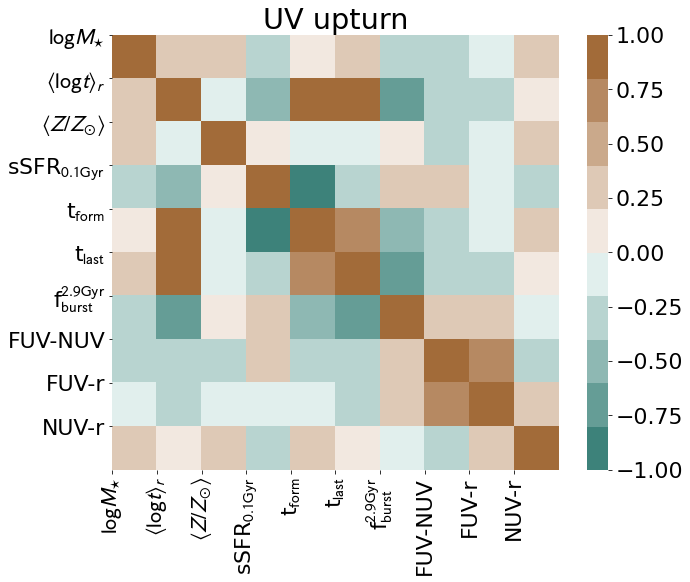

In [31]:
plt.rcParams.update(plotpars_hmp)
plt.subplots(figsize=(10,8))
ax = sns.heatmap(data=heatmap_upturn.corr(method='spearman'), cmap=cmap, vmin=-1., vmax=1.)
# labels = [item.get_text() for item in ax.get_xticklabels()]
plt.xticks(ticks=np.arange(0,10,1), labels=[r"$\logM_{\star}}$", 
                                            r"$\left<\log t\right>_{r}$", 
                                            r"$\left<Z/Z_{\odot}\right>$", 
                                            r"sSFR$_{0.1\rm{Gyr}}$", 
                                            r"t$_{\rm{form}}$", 
                                            r"t$_{\rm{last}}$", r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'],
           x=[0.5])
plt.yticks(ticks=np.arange(0,10,1), labels=[r"$\logM_{\star}}$", 
                                            r"$\left<\log t\right>_{r}$", 
                                            r"$\left<Z/Z_{\odot}\right>$", 
                                            r"sSFR$_{0.1\rm{Gyr}}$", 
                                            r"t$_{\rm{form}}$", 
                                            r"t$_{\rm{last}}$", r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'])
plt.title("UV upturn")
plt.savefig(os.path.join(psm_path, 'heatmap_upturn.pdf'))
plt.savefig(os.path.join(psm_path, 'heatmap_upturn.png'))
plt.show()

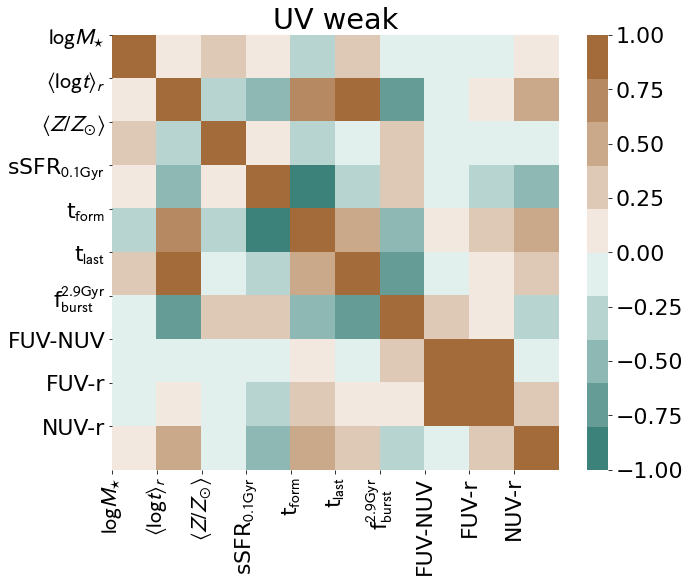

In [32]:
plt.rcParams.update(plotpars_hmp)
plt.subplots(figsize=(10,8))
# cmap = sns.diverging_palette(240, 10, n=9)
ax = sns.heatmap(data=heatmap_weak.corr(method='spearman'), cmap=cmap, vmin=-1., vmax=1.)
# labels = [item.get_text() for item in ax.get_xticklabels()]
plt.xticks(ticks=np.arange(0,10,1), labels=[r"$\logM_{\star}}$", 
                                            r"$\left<\log t\right>_{r}$", 
                                            r"$\left<Z/Z_{\odot}\right>$", 
                                            r"sSFR$_{0.1\rm{Gyr}}$", 
                                            r"t$_{\rm{form}}$", 
                                            r"t$_{\rm{last}}$", r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'])
plt.yticks(ticks=np.arange(0,10,1), labels=[r"$\logM_{\star}}$", 
                                            r"$\left<\log t\right>_{r}$", 
                                            r"$\left<Z/Z_{\odot}\right>$", 
                                            r"sSFR$_{0.1\rm{Gyr}}$", 
                                            r"t$_{\rm{form}}$", 
                                            r"t$_{\rm{last}}$", r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                            'FUV-NUV',
                                            'FUV-r',
                                            'NUV-r'])
plt.title("UV weak")
plt.savefig(os.path.join(psm_path, 'heatmap_weak.pdf'))
plt.savefig(os.path.join(psm_path, 'heatmap_weak.png'))
plt.show()

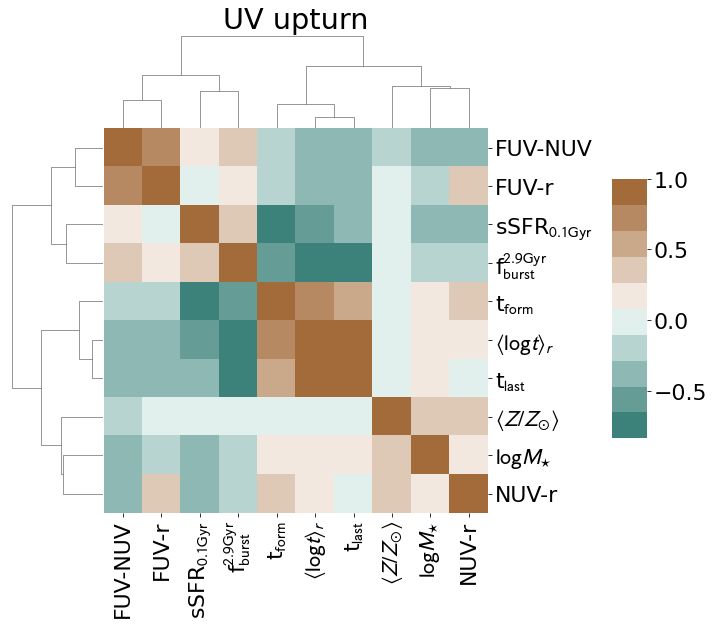

In [33]:
plt.rcParams.update(plotpars_cmp)
ax = sns.clustermap(data=heatmap_upturn.corr(method='spearman'), cmap=cmap, figsize=(12,12))
ax.ax_heatmap.yaxis.set_ticklabels(['FUV-NUV', 
                                    'FUV-r', 
                                    r"sSFR$_{0.1\rm{Gyr}}$",
                                    r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                    r"t$_{\rm{form}}$", 
                                    r"$\left<\log t\right>_{r}$",
                                    r"t$_{\rm{last}}$",
                                    r"$\left<Z/Z_{\odot}\right>$",                                     
                                    r"$\logM_{\star}}$", 
                                    'NUV-r'])
ax.ax_heatmap.xaxis.set_ticklabels(['FUV-NUV', 
                                    'FUV-r', 
                                    r"sSFR$_{0.1\rm{Gyr}}$",
                                    r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                    r"t$_{\rm{form}}$", 
                                    r"$\left<\log t\right>_{r}$",
                                    r"t$_{\rm{last}}$",
                                    r"$\left<Z/Z_{\odot}\right>$",                                     
                                    r"$\logM_{\star}}$", 
                                    'NUV-r'])
ax.ax_cbar.set_position(pos=[0.73, 0.5, 0.04, 0.3], which='both')
ax.ax_heatmap.set_title("UV upturn", pad=100)
plt.savefig(os.path.join(psm_path, 'clustermap_upturn.pdf'))
plt.savefig(os.path.join(psm_path, 'clustermap_upturn.png'))
plt.show()

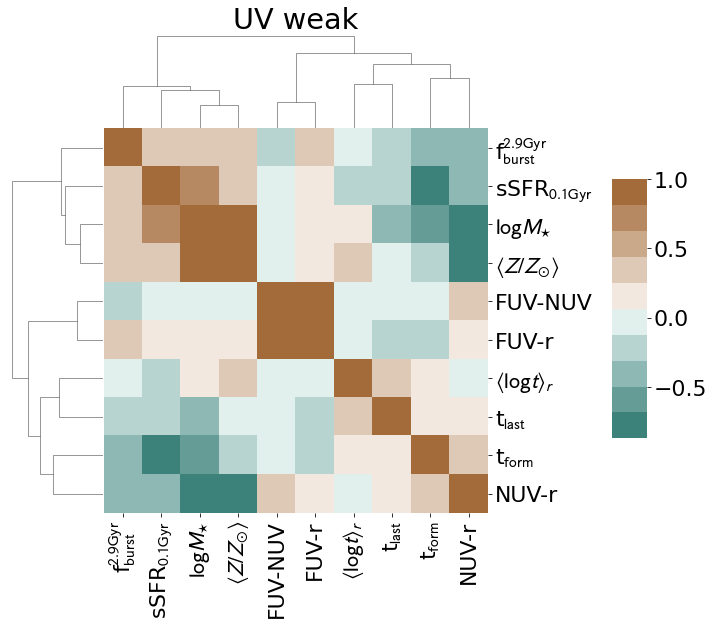

In [34]:
plt.rcParams.update(plotpars_cmp)
ax = sns.clustermap(data=heatmap_weak.corr(method='spearman'), cmap=cmap, figsize=(12,12))
ax.ax_heatmap.yaxis.set_ticklabels([r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                    r"sSFR$_{0.1\rm{Gyr}}$",
                                    r"$\logM_{\star}}$",
                                    r"$\left<Z/Z_{\odot}\right>$", 
                                    'FUV-NUV', 
                                    'FUV-r', 
                                    r"$\left<\log t\right>_{r}$",
                                    r"t$_{\rm{last}}$",
                                    r"t$_{\rm{form}}$", 
                                    'NUV-r'])
ax.ax_heatmap.xaxis.set_ticklabels([r"f$_{\rm{burst}}^{2.9\rm{Gyr}}$", 
                                    r"sSFR$_{0.1\rm{Gyr}}$",
                                    r"$\logM_{\star}}$",
                                    r"$\left<Z/Z_{\odot}\right>$", 
                                    'FUV-NUV', 
                                    'FUV-r', 
                                    r"$\left<\log t\right>_{r}$",
                                    r"t$_{\rm{last}}$",
                                    r"t$_{\rm{form}}$", 
                                    'NUV-r'])
ax.ax_cbar.set_position(pos=[0.73, 0.5, 0.04, 0.3], which='both')
ax.ax_heatmap.set_title("UV weak", pad=100)
plt.savefig(os.path.join(psm_path, 'clustermap_weak.pdf'))
plt.savefig(os.path.join(psm_path, 'clustermap_weak.png'))
plt.show()

In [35]:
heatmap_upturn.corr(method='spearman').round(decimals=2)

,mass_stellar_best_fit,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
mass_stellar_best_fit,1.00,0.24,0.27,-0.33,0.14,0.26,-0.20,-0.33,-0.15,0.25
ager_percentile50,0.24,1.00,-0.08,-0.54,0.81,0.93,-0.72,-0.32,-0.29,0.11
metalicity_Z_Zo_percentile50,0.27,-0.08,1.00,0.08,-0.06,-0.00,0.03,-0.24,-0.05,0.30
sSFR_0_1Gyr_percentile50,-0.33,-0.54,0.08,1.00,-0.83,-0.31,0.40,0.22,-0.02,-0.37
tform_percentile50,0.14,0.81,-0.06,-0.83,1.00,0.63,-0.54,-0.27,-0.12,0.27
tlastb_percentile50,0.26,0.93,-0.00,-0.31,0.63,1.00,-0.74,-0.32,-0.33,0.05
fb29_percentile50,-0.20,-0.72,0.03,0.40,-0.54,-0.74,1.00,0.32,0.24,-0.12
FUV-NUV,-0.33,-0.32,-0.24,0.22,-0.27,-0.32,0.32,1.00,0.75,-0.34
FUV-R,-0.15,-0.29,-0.05,-0.02,-0.12,-0.33,0.24,0.75,1.00,0.29
NUV-R,0.25,0.11,0.30,-0.37,0.27,0.05,-0.12,-0.34,0.29,1.00


In [36]:
heatmap_upturn.corr?

In [37]:
heatmap_weak.corr(method='spearman').round(decimals=2)

,mass_stellar_best_fit,ager_percentile50,metalicity_Z_Zo_percentile50,sSFR_0_1Gyr_percentile50,tform_percentile50,tlastb_percentile50,fb29_percentile50,FUV-NUV,FUV-R,NUV-R
mass_stellar_best_fit,1.00,0.10,0.34,0.12,-0.24,0.31,-0.02,-0.03,-0.03,0.05
ager_percentile50,0.10,1.00,-0.36,-0.57,0.73,0.82,-0.74,-0.01,0.14,0.42
metalicity_Z_Zo_percentile50,0.34,-0.36,1.00,0.12,-0.24,-0.10,0.21,-0.09,-0.15,-0.16
sSFR_0_1Gyr_percentile50,0.12,-0.57,0.12,1.00,-0.87,-0.25,0.28,-0.00,-0.21,-0.42
tform_percentile50,-0.24,0.73,-0.24,-0.87,1.00,0.42,-0.40,0.01,0.20,0.42
tlastb_percentile50,0.31,0.82,-0.10,-0.25,0.42,1.00,-0.76,-0.06,0.08,0.36
fb29_percentile50,-0.02,-0.74,0.21,0.28,-0.40,-0.76,1.00,0.32,0.16,-0.32
FUV-NUV,-0.03,-0.01,-0.09,-0.00,0.01,-0.06,0.32,1.00,0.82,-0.14
FUV-R,-0.03,0.14,-0.15,-0.21,0.20,0.08,0.16,0.82,1.00,0.38
NUV-R,0.05,0.42,-0.16,-0.42,0.42,0.36,-0.32,-0.14,0.38,1.00


In [38]:
uv_pal = ['#dfc27d', '#a6611a']

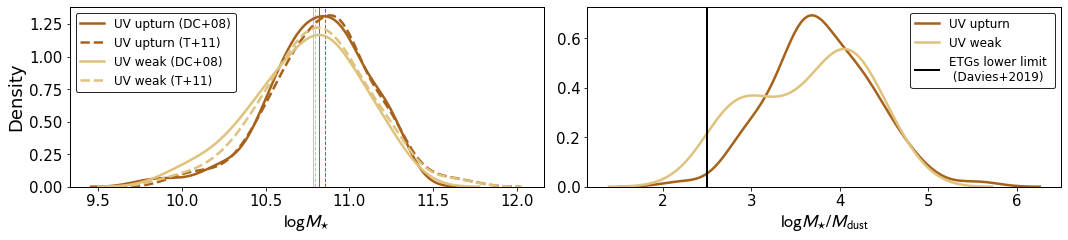

In [39]:
plt.rcParams.update(plotpars_2cols)
plt.subplots(figsize=(15,3.5))

plt.subplot(1,2,1)
plt.axvline(x=np.median(np.log10(uv_upturn['mass_stellar_best_fit_x'].values)), color=uv_pal[1], lw=1, alpha=1.)
plt.axvline(x=np.median(uv_upturn['logmstar']), color=uv_pal[1], linestyle='--', lw=1, alpha=1.)
plt.axvline(x=np.median(np.log10(uv_weak['mass_stellar_best_fit_x'].values)), color=uv_pal[0], lw=1, alpha=1.)
plt.axvline(x=np.median(uv_weak['logmstar']), color=uv_pal[0], linestyle='--', lw=1., alpha=1.)

sns.kdeplot(np.log10(uv_upturn['mass_stellar_best_fit_x'].values), label='UV upturn (DC+08)', color=uv_pal[1], 
            lw=2.5, alpha=1.)
sns.kdeplot(uv_upturn['logmstar'].values, label='UV upturn (T+11)', color=uv_pal[1], linestyle='--', lw=2.5, 
            alpha=1.)
sns.kdeplot(np.log10(uv_weak['mass_stellar_best_fit_x'].values), label='UV weak (DC+08)', color=uv_pal[0], lw=2.5, 
            alpha=1.)
sns.kdeplot(uv_weak['logmstar'].values, label='UV weak (T+11)', color=uv_pal[0], linestyle='--', lw=2.5, alpha=1.)
plt.xlabel(r"$\log M_{\star}$")
plt.ylabel('Density') 

plt.subplot(1,2,2)
sns.kdeplot(uv_upturn['log_mdust/mstar'], label='UV upturn', color=uv_pal[1], lw=2.5, alpha=1.)
sns.kdeplot(uv_weak['log_mdust/mstar'], label='UV weak', color=uv_pal[0], lw=2.5, alpha=1.)
plt.axvline(x=2.5, color='black', lw=2., label='ETGs lower limit \n (Davies+2019)', alpha=1.)
plt.xlabel(r"$\log M_{\star}/M_{\rm{dust}}$")
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'dust_masses_psmed.png'))
plt.savefig(os.path.join(psm_path, 'dust_masses_psmed.pdf'))
plt.show()

In [40]:
for i in range(uv_upturn['log_mdust/mstar'].values.size):
    if uv_upturn['log_mdust/mstar'].iloc[i]<=2.5:
        print(uv_upturn['log_mdust/mstar'].iloc[i])

2.2062292717642853


In [41]:
for i in range(uv_weak['log_mdust/mstar'].values.size):
    if uv_weak['log_mdust/mstar'].iloc[i]<=2.5:
        print(uv_weak['log_mdust/mstar'].iloc[i])

2.3242837230045295


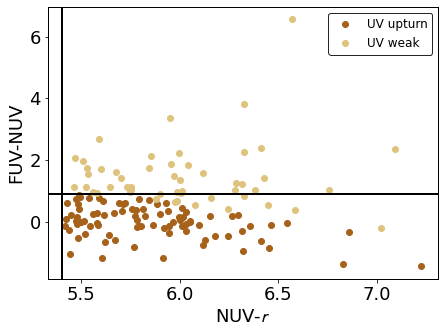

In [42]:
plt.rcParams.update(plotpars)
plot01, = plt.plot(uv_upturn['MAG_AB_NUV']-uv_upturn['MAG_AB_R'], uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'],
                   'o', markersize=6, color=palette[1], alpha=1, label="UV upturn")
plot02, = plt.plot(uv_weak['MAG_AB_NUV']-uv_weak['MAG_AB_R'], uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'],
                   'o', markersize=6, color = palette[0], alpha=1, label="UV weak")
plt.legend(loc='best')
plt.axvline(x=5.4, color='black', linewidth=2.)
plt.axhline(y=0.9, xmin=0.0, xmax=20, color='black', linewidth=2.)
plt.xlabel(r"NUV-$r$")
plt.ylabel(r"FUV-NUV")
plt.savefig(os.path.join(psm_path, 'yi_diagram_psm.pdf'))
plt.savefig(os.path.join(psm_path, 'yi_diagram_psm.png'))
plt.show()